# Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt

## Load the data from CSV file

In [2]:
cust = pd.read_csv('data/telco_customer_churn.csv')

In [3]:
display(HTML(cust.head().to_html()))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the Column Types

In [4]:
cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Convert String labels to Numeric

In [5]:
cust['Churn'] = np.where(cust['Churn']=='Yes',1,0)

### Select features to Train the model

In [6]:
cust = cust[['gender','MonthlyCharges','tenure','Churn']]

### Split the data set into Train and Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cust.drop(columns = ['Churn'], axis=1), cust['Churn'], test_size=0.2, random_state=2018, shuffle=True)

### Encode the categorical variables

In [8]:
print(X_train.shape)
print(X_test.shape)

(5634, 3)
(1409, 3)


In [9]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [10]:
print(X_train.shape)
print(X_test.shape)

(5634, 4)
(1409, 4)


In [11]:
display(HTML(X_train.head().to_html()))

,MonthlyCharges,tenure,gender_Female,gender_Male
3569,19.95,17,0,1
5900,40.20,37,0,1
1056,80.00,5,1,0
4417,70.45,1,0,1
4756,72.45,31,0,1


### Train Random Forest Classifier

In [12]:
randf = RandomForestClassifier(max_depth=4, random_state=2018, n_estimators=100)
randf = randf.fit(X_train, y_train)

In [13]:
randf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

### Display Relative Feature Importance

In [14]:
randf.feature_importances_

array([ 0.35680934,  0.63840035,  0.00254229,  0.00224802])

In [15]:
importances = randf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

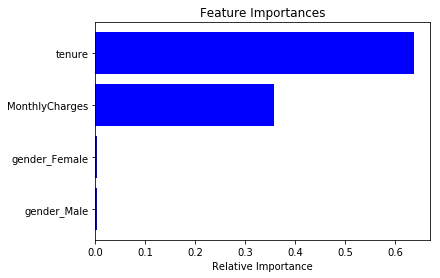

In [16]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Predict on the Test dataset using the Trained model

In [17]:
pred_test = randf.predict(X_test)
pred_test_prob = randf.predict_proba(X_test)

### Evaluate the model performance

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test_prob[:,1])
roc_auc = metrics.auc(fpr, tpr)

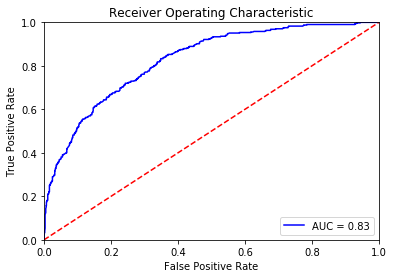

In [19]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Area Under the Curve (AUC)

In [20]:
metrics.roc_auc_score(y_test, pred_test_prob[:,1])

0.82602485446796825

#### Overall Accuracy

In [21]:
metrics.accuracy_score(y_test, pred_test)

0.78282469836763657